# Discussion 3: String, Group, Joining Operations in Pandas

We will continue discussion of [Pandas](https://pandas.pydata.org/). In this discussion, you will learn about:

* String operations
* Groupby 
* Joining DataFrames

You will not have enough time to do all of these problems in discussion and your TA will select a subset of the problems to complete. The rest are provided for your practice.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
from pathlib import Path
%matplotlib inline

import urllib.request
import os.path
import zipfile

#Download and unzip data for babynames
data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

#create dataframe of babynames
ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head(5) #Gets first 5 entries of df

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


## Question 1: Groupby

Let's now turn to using groupby from lecture 5.

**Note:** This [slide](https://docs.google.com/presentation/d/1d75B4Co8jHeSam8Mt5nZNfyIAVu_f1WFNIqdz19D7To/edit#slide=id.g8a5b9458f2_0_1199) provides a visual picture of how `groupby.agg` works if you'd like a reference.

## Questions 1a - 1c: Elections

Let's start by reading in the election dataset.

In [2]:
elections = pd.read_csv("elections.csv")
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


As we did in class, we can groupby "Party" and then print out the subframes that result. This isn't something you'll do often, but just so you can see it in code, an example is given below for elections since 1980.

In [3]:
for n, g in elections.query("Year >= 1980").groupby("Party"):
    print(f"Name: {n}") # by the way this is an "f string", a relatively new and great feature of Python
    display(g)

Name: Citizens


,Year,Candidate,Party,Popular vote,Result,%
127,1980,Barry Commoner,Citizens,233052,loss,0.270182


Name: Constitution


,Year,Candidate,Party,Popular vote,Result,%
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
164,2008,Chuck Baldwin,Constitution,199750,loss,0.152398
172,2016,Darrell Castle,Constitution,203091,loss,0.149640


Name: Democratic


,Year,Candidate,Party,Popular vote,Result,%
129,1980,Jimmy Carter,Democratic,35480115,loss,41.132848
134,1984,Walter Mondale,Democratic,37577352,loss,40.729429
137,1988,Michael Dukakis,Democratic,41809074,loss,45.770691
140,1992,Bill Clinton,Democratic,44909806,win,43.118485
144,1996,Bill Clinton,Democratic,47400125,win,49.296938
151,2000,Al Gore,Democratic,50999897,loss,48.491813
158,2004,John Kerry,Democratic,59028444,loss,48.306775
162,2008,Barack Obama,Democratic,69498516,win,53.023510
168,2012,Barack Obama,Democratic,65915795,win,51.258484
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539


Name: Green


,Year,Candidate,Party,Popular vote,Result,%
149,1996,Ralph Nader,Green,685297,loss,0.712721
155,2000,Ralph Nader,Green,2882955,loss,2.741176
156,2004,David Cobb,Green,119859,loss,0.098088
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
170,2012,Jill Stein,Green,469627,loss,0.365199
177,2016,Jill Stein,Green,1457226,loss,1.073699


Name: Independent


,Year,Candidate,Party,Popular vote,Result,%
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
143,1992,Ross Perot,Independent,19743821,loss,18.956298
161,2004,Ralph Nader,Independent,465151,loss,0.380663
167,2008,Ralph Nader,Independent,739034,loss,0.563842
174,2016,Evan McMullin,Independent,732273,loss,0.539546


Name: Libertarian


,Year,Candidate,Party,Popular vote,Result,%
128,1980,Ed Clark,Libertarian,921128,loss,1.067883
132,1984,David Bergland,Libertarian,228111,loss,0.247245
138,1988,Ron Paul,Libertarian,431750,loss,0.472660
139,1992,Andre Marrou,Libertarian,290087,loss,0.278516
146,1996,Harry Browne,Libertarian,485759,loss,0.505198
153,2000,Harry Browne,Libertarian,384431,loss,0.365525
159,2004,Michael Badnarik,Libertarian,397265,loss,0.325108
163,2008,Bob Barr,Libertarian,523715,loss,0.399565
169,2012,Gary Johnson,Libertarian,1275971,loss,0.992241
175,2016,Gary Johnson,Libertarian,4489235,loss,3.307714


Name: Natural Law


,Year,Candidate,Party,Popular vote,Result,%
148,1996,John Hagelin,Natural Law,113670,loss,0.118219


Name: New Alliance


,Year,Candidate,Party,Popular vote,Result,%
136,1988,Lenora Fulani,New Alliance,217221,loss,0.237804


Name: Populist


,Year,Candidate,Party,Popular vote,Result,%
141,1992,Bo Gritz,Populist,106152,loss,0.101918


Name: Reform


,Year,Candidate,Party,Popular vote,Result,%
150,1996,Ross Perot,Reform,8085294,loss,8.408844
154,2000,Pat Buchanan,Reform,448895,loss,0.426819


Name: Republican


,Year,Candidate,Party,Popular vote,Result,%
131,1980,Ronald Reagan,Republican,43903230,win,50.897944
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
135,1988,George H. W. Bush,Republican,48886597,win,53.518845
142,1992,George H. W. Bush,Republican,39104550,loss,37.544784
145,1996,Bob Dole,Republican,39197469,loss,40.766036
152,2000,George W. Bush,Republican,50456002,win,47.974666
157,2004,George W. Bush,Republican,62040610,win,50.771824
166,2008,John McCain,Republican,59948323,loss,45.737243
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862


Name: Taxpayers


,Year,Candidate,Party,Popular vote,Result,%
147,1996,Howard Phillips,Taxpayers,184656,loss,0.192045


### Question 1a
Using `groupby.agg` or one of the shorthand methods (`groupby.min`, `groupby.first`, etc.), create a Series `best_result` that gives the highest percentage vote ever attained by each party. For example `best_result['Libertarian']` should return 3.3. The order of your Series does not matter.

In [ ]:
best_result = ...
best_result.head(5)

### Question 1b  
Again using `groupby.agg` or one of the its shorthand methods, create a DataFrame `last_result` that gives the result for a party in its most recent year of participation.

For example `last_result.query("Party == 'Whig'")` or `last_result.loc[['Whig']]` should return the data shown below. Note: In your DataFrame, Party should be the index, not a column.

|Party | Year | Candidate      | Popular Vote | Result | %         |
|------|------|----------------|--------------|--------|-----------|
|**Whig**  | 1852 | Winfield Scott | 1386942      | loss   | 44.056548 |

In [ ]:
last_result = ...

Next let's try using `groupby.filter`. As an example, the code below filters our DataFrame so that rows are only kept for parties that have ever won an election.

As a reminder of how filter works, see [this slide](https://docs.google.com/presentation/d/1d75B4Co8jHeSam8Mt5nZNfyIAVu_f1WFNIqdz19D7To/edit#slide=id.g8a5b9458f2_0_1586).

In [ ]:
def at_least_one_candidate_in_the_frame_has_won(frame):
    """Returns df with rows only kept for parties that have
    won at least one election
    """
    win_count = sum(frame["Result"] == 'win')
    return win_count > 0

winners_only = elections.groupby("Party").filter(at_least_one_candidate_in_the_frame_has_won)
winners_only.tail(10)

### Question 1c
Using `filter`, create a DataFrame `major_party_results_since_1988` that includes all election results starting in 1988, but show only a row if the Party it belongs to has earned at least 1% of the popular vote in ANY election since 1988.

For example, in 1988, you should not include the `New Alliance` candidate, since this party has not earned 1% of the vote since 1988. However, you should include the `Libertarian` candidate from 1988 despite only having 0.47 percent of the vote in 1988, because in 2016, the Libertarian candidate Gary Johnson had 3.3% of the vote.

In [ ]:
major_party_results_since_1988 = ...
major_party_results_since_1988.head(4)

## Questions 1d - 1e: Babynames

### Question 1d
Let's shift gears, and now find the total occurences of female baby names in California.

Create a Series `female_name_since_2000_count` which gives the total number of occurrences of each name for female babies born in California from the year 2000 or later. The index should be the name, and the value should be the total number of births. Your series should be ordered in decreasing order of count. For example, your first row should have index "Emily" and value 51081, because 51081 Emilys have been born since the year 2000 in California.

In [ ]:
female_name_since_2000_count = ...

### Question 1e
Using `groupby`, create a Series listing all baby names from 2018 in decreasing order of popularity. The result should not be broken down by sex! If a name is used by both male and female babies, the number you provide should be the total.

**Note:** *In this question we are now computing the number of registered babies with a given name.* 

For example, `count_for_names_2018["Noah"]` should be the number 2579 because in 2018 there were 2567 Noahs born (12 female and 2567 male).

In [4]:
count_for_names_2018 = ...

## Question 2: Grouping Multiple Columns

### Question 2a

Create a dataframe `major_party_results_avg` that transforms the dataframe `winners_only` to output the dataframe below.  The dataframe should have the index `Party`, and should have columns which depict the mean percentage that the party has lost or won across all elections.

Recall that the arguments to `pd.pivot_table` are as follows: `data` is the input dataframe, `index` includes the values we use as rows, `columns` are the columns of the pivot table, `values` are the values in the pivot table, and `aggfunc` is the aggregation function that we use to aggregate `values`.

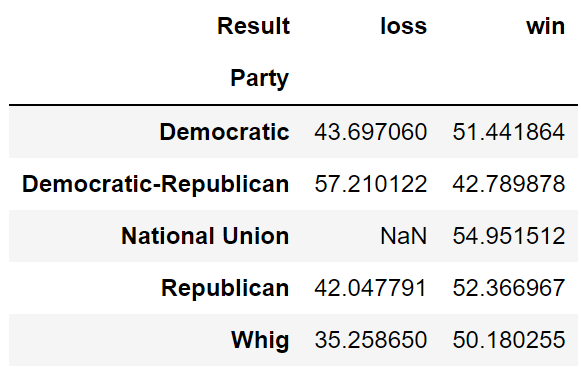

In [ ]:
major_party_results_avg = ...
major_party_results_avg

### Question 2b
Consider the output of the `groupby.sum()` call below. Note that the resulting DataFrame is multi-indexed.  This dataframe below gives us the count of the number of occurences per year.

In [ ]:
name_counts_since_1940 = babynames[babynames["Year"] >= 1940].groupby(["Name", "Year"]).sum()
name_counts_since_1940.head(9)

Multi-indexed DataFrames can be a little confusing at first, but the ideas for using loc generalize pretty naturally. Examples below:

In [ ]:
name_counts_since_1940.loc['Aahna':'Aairah']

In [ ]:
#Use both indices
name_counts_since_1940.loc[("Aahna", 2008):("Aaiden", 2014)]

Using `name_counts_since_1940`, set `imani_2013_count` equal to the number of babies born with the name 'Imani' in the year 2013. You may use either `.loc`. or `.query`. Make sure you're returning a value and not a Series or DataFrame

In [ ]:
#name_counts_since_1940.query("Year == 2013 and Name == 'Imani'").iloc[0, 0]
imani_2013_count = ...

Note: Sometimes it's just useful to throw away the index and go back to having arbitrary numbers as an index. To do this, we use `reset_index()`.

In [ ]:
name_counts_since_1940_numerical_index = name_counts_since_1940.reset_index()
name_counts_since_1940_numerical_index.head(10)

## Question 3: String Operations and Table Joining

Create a new DataFrame called `elections_with_first_name` with a new column `First Name` that is equal to the Candidate's first name.

Hint: Use `.str.split`.

In [ ]:
elections_with_first_name = ...

Now create `elections_and_names` by joining the `elections_with_first_name` table with `name_counts_since_1940_numerical_index` on the first names of each person.

In [ ]:
elections_and_names = ...

Below we make a crude plot of election winners and losers. According to this plot, since the 1970s, we haven't had a president with a name that was highly common in the year he was elected. 

Note that our data is a bit messy since, for example, Bill Clinton's name in the data set is "Bill", when in fact his legal name is William.

In [ ]:
elections_and_names.query("Result == 'win'").set_index("Year")["Count"].plot()
elections_and_names.query("Result == 'loss'").sort_values("%").groupby("Year")['Count'].last().plot()
plt.title('Election Candidate Name Popularity')
plt.ylabel('Name Count')
plt.legend(["Winner", "Loser"])
plt.show()